## Bike Sharing Demand - Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
train_df = pd.read_csv('data/train.csv')

### Transform and Preview Data

In [3]:
train_df['hour'] = train_df['datetime'].apply(lambda x: pd.to_datetime(x).hour)
train_df = pd.get_dummies(train_df, columns=['season','weather','hour']) # One hot encoding for discrete variables.
train_df = train_df.rename(columns={'season_1': 'spring', 'season_2':'summer', 'season_3':'fall', 'season_4':'winter',
                                    'weather_1': 'clear', 'weather_2': 'mist', 'weather_3': 'light_rain', 'weather_4': 'heavy_rain',
                                    'count': 'rentals'})
train_df.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,rentals,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,...,0,0,0,0,0,0,0,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,...,0,0,0,0,0,0,0,0,0,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,...,0,0,0,0,0,0,0,0,0,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,...,0,0,0,0,0,0,0,0,0,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


### Regression Models

In [4]:
drop_cols = ['datetime','casual','registered','rentals']
X = train_df.drop(drop_cols, axis=1).values
y = train_df['rentals'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Normal Linear Regression

In [6]:
linreg_clf = LinearRegression().fit(X_train, y_train)
y_pred = linreg_clf.predict(X_test)

In [7]:
score = linreg_clf.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print('R^2 Score: ', score)
print('MSE: ', mse)

R^2 Score:  0.617820639342
MSE:  12411.2266107


In [8]:
# Examples of true values vs predicted values
values = pd.DataFrame()
values['True'] = y_test
values['Predicted'] = y_pred
values.head()

,True,Predicted
0,244,183.908936
1,239,303.414124
2,229,254.595520
3,467,390.956909
4,335,296.309326


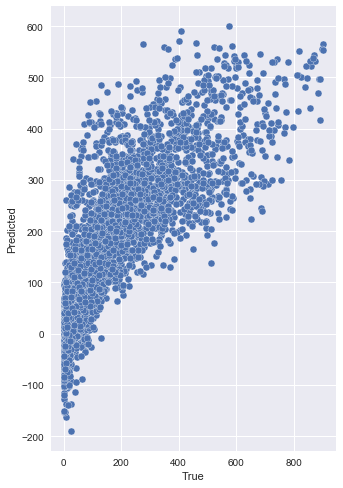

In [9]:
# Scattor plot of true vs predicted values
sns.pairplot(values, x_vars='True', y_vars='Predicted', size=7, aspect=0.7)
plt.show()

#### Try Lasso, a regularized form (with the L1 norm) of regression.

In [10]:
lasso_clf = Lasso(alpha=0.5).fit(X_train, y_train)
score = lasso_clf.score(X_test, y_test)
score

0.61338517722831642

No improvement. We can stop here.